In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'/data2/share/home/liyi/CbpTE/ReseqTE_matrix/19Ge_reseq_matrix/filt')

In [2]:
pop = pd.read_csv('../0-scripts/population.txt', sep='\t', dtype=str, index_col=0, header=None)
cov = pd.read_csv('/data2/share/home/liyi/TEs/SNP_calc/sample_depth', sep='\t', dtype=str, index_col=0, header=None).iloc[:, :1]

In [35]:
Cbp_mat = pd.read_csv('reseq_Cbp.mat', sep='\t', dtype=str)
Cbp_mat1 = Cbp_mat.iloc[:, 5:].replace('./.', np.nan)
Cbp_mat1_MissingRate = (Cbp_mat1.shape[0] - Cbp_mat1.count()) / Cbp_mat1.shape[0]
data_Cbp = Cbp_mat1_MissingRate.reset_index(drop=True)
Cbp_mat1_count = Cbp_mat1.count()

In [36]:
Cbp_mat1_pop = pd.concat([Cbp_mat1_MissingRate, pop, cov, Cbp_mat1_count], axis=1, join='inner')
Cbp_mat1_pop.columns = ['mr', 'pop', 'cov', 'count']

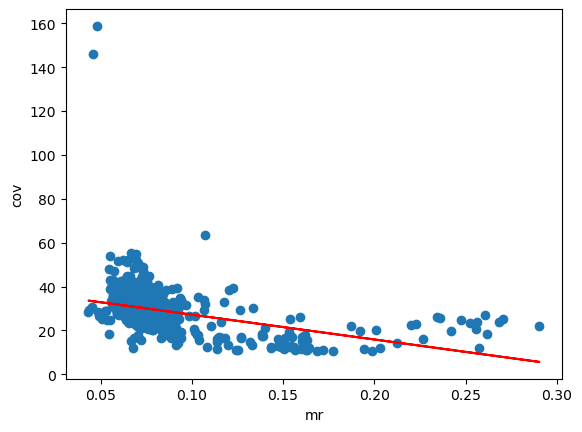

In [37]:
plt.scatter(Cbp_mat1_pop['mr'].astype(float), Cbp_mat1_pop['cov'].astype(float))
m,b=np.polyfit(Cbp_mat1_pop['mr'].astype(float),Cbp_mat1_pop['cov'].astype(float),1)
plt.plot(Cbp_mat1_pop['mr'], m*Cbp_mat1_pop['mr']+b, 'r')
plt.xlabel('mr')
plt.ylabel('cov')
plt.show()

In [50]:
# cond1 = ((Cbp_mat1_pop['mr'] > 0.2) & (Cbp_mat1_pop['pop'] == 'EU'))
cond1 = ((Cbp_mat1_pop['mr'] > 0.2))
data_Cbp1 = Cbp_mat1_pop.loc[cond1, :].reset_index(drop=True)

In [51]:
data_Cbp1['pop'].value_counts()

pop
EU     8
CC     6
SC     4
Mix    1
Name: count, dtype: int64

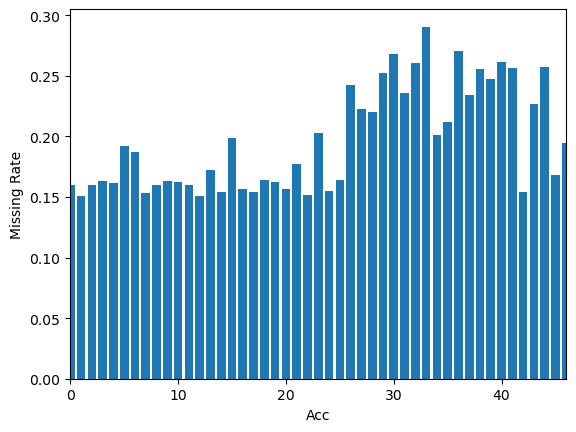

In [45]:
plt.bar(data_Cbp1.index, data_Cbp1.values)
# plt.bar(data_Cbp_filt.index, data_Cbp_filt.values)
plt.xlabel('Acc')
plt.ylabel('Missing Rate')
plt.xlim(min(data_Cbp1.index), max(data_Cbp1.index))
plt.show()

In [7]:
Cor_mat = pd.read_csv('reseq_Cor.mat', sep='\t', dtype=str)
Cor_mat1 = Cor_mat.iloc[:, 6:].replace('./.', np.nan)
Cor_mat1_MissingRate = (Cor_mat1.shape[0] - Cor_mat1.count()) / Cor_mat1.shape[0]
data_Cor = Cor_mat1_MissingRate.reset_index(drop=True)
data_Cor_filt = data_Cor[data_Cor <= 0.1]

In [8]:
data_Cor.mean()

0.05506533273551112

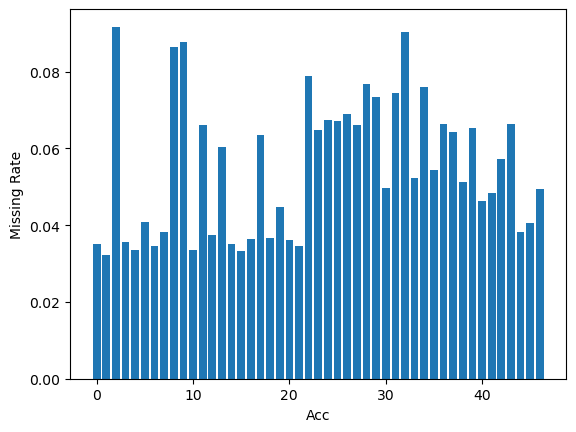

In [9]:
plt.bar(data_Cor.index, data_Cor.values)
plt.xlabel('Acc')
plt.ylabel('Missing Rate')
plt.show()

In [10]:
Cru_mat = pd.read_csv('reseq_Cru.mat', sep='\t', dtype=str)
Cru_mat1 = Cru_mat.iloc[:, 6:].replace('./.', np.nan)
Cru_mat1_MissingRate = (Cru_mat1.shape[0] - Cru_mat1.count()) / Cru_mat1.shape[0]
data_Cru = Cru_mat1_MissingRate.reset_index(drop=True)
data_Cru_filt = data_Cru[data_Cru <= 0.1]

In [11]:
data_Cru.mean()

0.0560364734645927

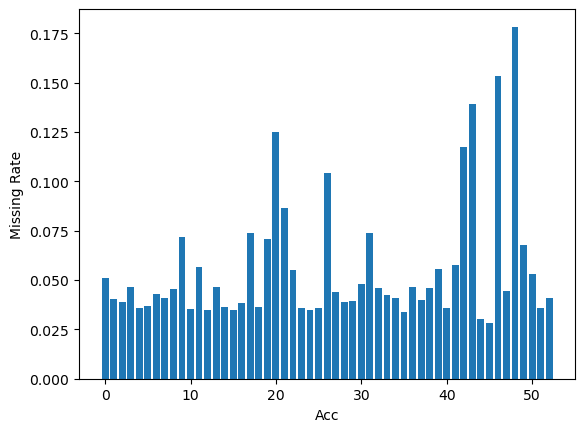

In [12]:
plt.bar(data_Cru.index, data_Cru.values)
plt.xlabel('Acc')
plt.ylabel('Missing Rate')
plt.show()

In [13]:
cru_test = pd.concat([Cru_mat.iloc[:, 6:].apply(lambda col: col.value_counts()).T, Cru_mat1_MissingRate], axis=1)

In [19]:
cru_test['1/1'].describe()

count       53.000000
mean     29283.886792
std       4173.521409
min      17603.000000
25%      28298.000000
50%      30094.000000
75%      31681.000000
max      37898.000000
Name: 1/1, dtype: float64